In [11]:
import re
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('seaborn')
%matplotlib inline

In [2]:
df = pd.read_csv('referrals.csv', date_parser='Date')

In [3]:
df.shape

(4352, 5)

In [4]:
df['Date'] = pd.to_datetime(df['Date'])

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4352 entries, 0 to 4351
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   Unnamed: 0  4352 non-null   int64         
 1   Date        4352 non-null   datetime64[ns]
 2   Poster      4266 non-null   object        
 3   Replies     4352 non-null   int64         
 4   Views       4352 non-null   int64         
dtypes: datetime64[ns](1), int64(3), object(1)
memory usage: 153.1+ KB


In [6]:
df.index

RangeIndex(start=0, stop=4352, step=1)

In [7]:
df.head()

,Unnamed: 0,Date,Poster,Replies,Views
0,0,2020-07-08,mskobe,4,416
1,1,2020-07-08,bdref,5,1023
2,2,2020-07-07,dummyUser,1,506
3,3,2020-07-07,mandyhorse,7,776
4,4,2020-07-07,vertise827,0,392


Text(0.5, 1.0, 'daily number of posts')

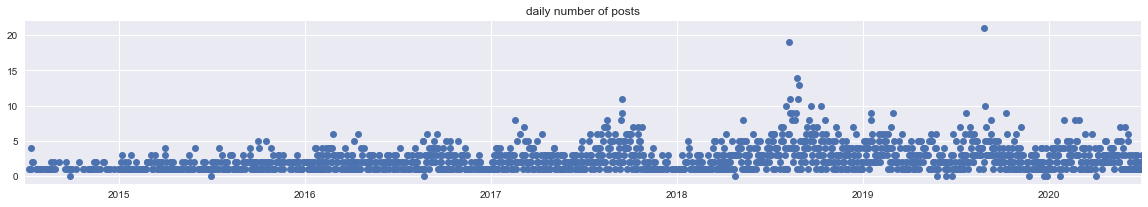

In [42]:
# df.groupby('Date').count()['Poster'].plot(figsize=(20, 3),,
#                                          xlim=)
plt.figure(figsize=(20,3))
plt.plot(df.groupby('Date').count()['Poster'], marker='o', linestyle='')
plt.xlim((pd.to_datetime('2014-07-01'), pd.to_datetime('2020-07-01')))
plt.title('daily number of posts')

In [9]:
df_new = df.groupby('Date').count()
df_new.head()

,Unnamed: 0,Poster,Replies,Views
Date,,,,
2012-07-03,1,1,1,1
2013-02-18,1,1,1,1
2013-06-03,1,1,1,1
2013-06-10,1,1,1,1
2013-07-04,1,1,1,1


In [25]:
daily_post_avg_7 = df_new.rolling(7).mean()['Poster']
daily_post_avg_30 = df_new.rolling(28).mean()['Poster']

Text(0.5, 1.0, 'Rolling averages of daily posts offering internal referrals')

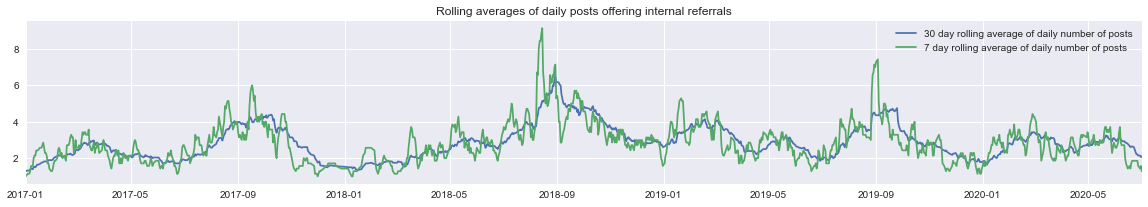

In [33]:
plt.figure(figsize=(20, 3))
plt.plot(daily_post_avg_30, label='30 day rolling average of daily number of posts')
plt.plot(daily_post_avg_7, label='7 day rolling average of daily number of posts')
plt.xlim((pd.to_datetime('2017-01-01'), pd.to_datetime('2020-07-01')))
plt.legend()
plt.title('Rolling averages of daily posts offering internal referrals')
# plt.xticks([0, 1, 2], ['January', 'February', 'March'])

In [95]:
df.groupby(['Poster']).agg({'Views': ['mean', 'nunique'], 'Replies': ['min', 'max']})


Views         Replies     
              mean nunique     min  max
Poster                                 
$_then      3870.0       1      12   12
007623       299.0       1       0    0
050544117  54044.0       1     170  170
072822      2832.0       1      15   15
0825jie     2610.8       5       0   80
...            ...     ...     ...  ...
高级智囊        3204.0       1      29   29
魔岩文化        8809.0       1      22   22
鱼吃鱼翅       11212.5       2      37   41
鸟月月         8724.0      13      47  312
麻倉枼         1644.0       1       0    0

[3097 rows x 4 columns]